### Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
diabetes_df = pd.read_csv('./diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Creating feature and target arrays

In [3]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df['glucose'].values

#### Print the type to confirm that it is a numpy array

In [7]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

### Making predictions from a single feature

In [9]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

(768,) (768,)


but our features must be formatted as a two-dimensional array to be accepted by scikit-learn. To convert the shape of X_bmi we apply NumPy's dot-reshape method, passing minus one followed by one. Printing the shape again shows X_bmi is now the correct shape for our model.

In [10]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(768, 1)

### Plotting

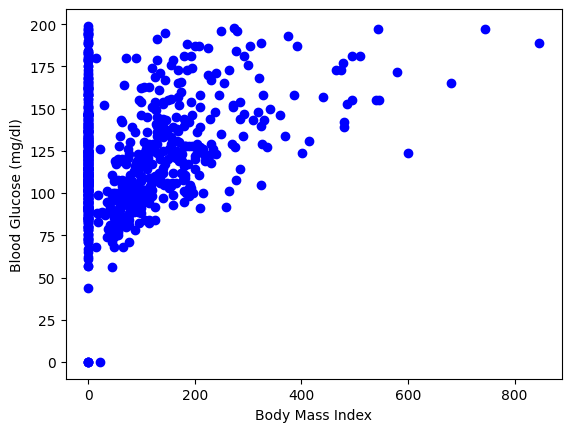

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y, color='blue')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Fitting a regression model

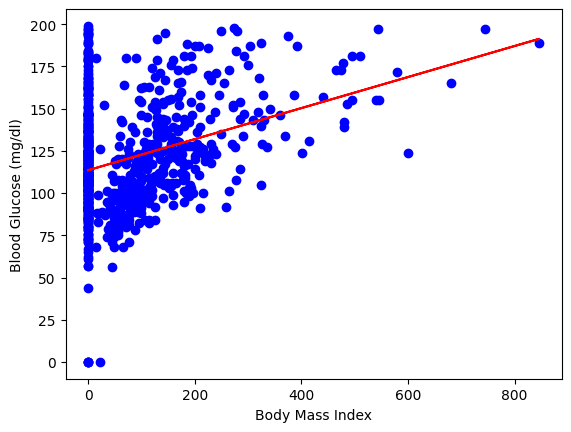

In [13]:
reg = LinearRegression()

reg.fit(X_bmi, y)
predicitions = reg.predict(X_bmi)

# Create scatter plot
plt.scatter(X_bmi, y, color="blue")

# Create Line plot
plt.plot(X_bmi, predicitions, color='red')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()


### Linear Regression using all features

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

#### R-squared in scikit-learn

In [20]:
reg_all.score(X_test, y_test)

0.2828046881037517

#### RMSE in scikit-learn

In [22]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

26.341459582232254

### Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
cv_results

array([0.26207548, 0.28228176, 0.41203082, 0.23785884, 0.41634629,
       0.30398869])

In [24]:
np.mean(cv_results), np.std(cv_results)

(0.3190969786734479, 0.07015320610114208)

In [25]:
np.quantile(cv_results, [0.025, 0.0975])

array([0.24088592, 0.24966445])

### Regularized regression
#### Ridge regression

In [26]:
from sklearn.linear_model import Ridge
scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

scores

[0.28284666232222233,
 0.28320633574804754,
 0.2853000732200003,
 0.26423984812668133,
 0.19292424694100963]

#### Lasso regression

In [27]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

scores

[0.2831114455475573,
 0.29795609755827845,
 0.17989838789273882,
 0.18127361610181125,
 0.15679544303617965]

### Lasso for feature selection in scikit-learn
- Lasso can select important features of a dataset
- Shrinks the coefficients of less important features to zero
- Features not shrunk to zero are selected by lasso

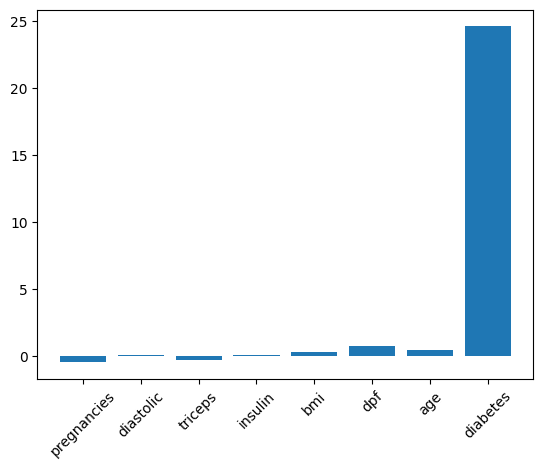

In [28]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

# Create the plot
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()